In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_prcp_val = session.query(Measurement).first()
date_prcp_val.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x115969210>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [11]:
prcp_data = session.query(Measurement).filter(Measurement.date > "2016-08-19")
prcp_data

In [12]:
prcp_list = []
months_list = []
    
for prcp in prcp_data:
    prcp_list.append(prcp.prcp)
    months_list.append(prcp.date)

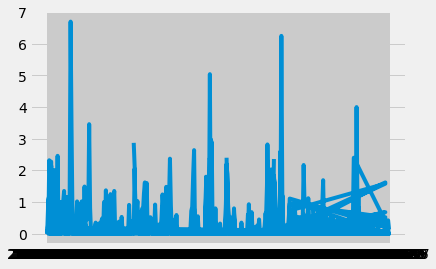

In [13]:
plt.plot(months_list, prcp_list)
plt.show()

In [14]:
# Calculate the date 1 year ago from the last data point in the database
from sqlalchemy import distinct
month_data_dist = session.query(distinct(Measurement.date)).order_by(Measurement.date.desc()).limit(365)
month_data_dist

In [15]:
month_list_all = []

for month in month_data_dist:
    month_list_all.append(month[0])
    
month_list_all

['2017-08-23',
 '2017-08-22',
 '2017-08-21',
 '2017-08-20',
 '2017-08-19',
 '2017-08-18',
 '2017-08-17',
 '2017-08-16',
 '2017-08-15',
 '2017-08-14',
 '2017-08-13',
 '2017-08-12',
 '2017-08-11',
 '2017-08-10',
 '2017-08-09',
 '2017-08-08',
 '2017-08-07',
 '2017-08-06',
 '2017-08-05',
 '2017-08-04',
 '2017-08-03',
 '2017-08-02',
 '2017-08-01',
 '2017-07-31',
 '2017-07-30',
 '2017-07-29',
 '2017-07-28',
 '2017-07-27',
 '2017-07-26',
 '2017-07-25',
 '2017-07-24',
 '2017-07-23',
 '2017-07-22',
 '2017-07-21',
 '2017-07-20',
 '2017-07-19',
 '2017-07-18',
 '2017-07-17',
 '2017-07-16',
 '2017-07-15',
 '2017-07-14',
 '2017-07-13',
 '2017-07-12',
 '2017-07-11',
 '2017-07-10',
 '2017-07-09',
 '2017-07-08',
 '2017-07-07',
 '2017-07-06',
 '2017-07-05',
 '2017-07-04',
 '2017-07-03',
 '2017-07-02',
 '2017-07-01',
 '2017-06-30',
 '2017-06-29',
 '2017-06-28',
 '2017-06-27',
 '2017-06-26',
 '2017-06-25',
 '2017-06-24',
 '2017-06-23',
 '2017-06-22',
 '2017-06-21',
 '2017-06-20',
 '2017-06-19',
 '2017-06-

In [16]:
# Perform a query to retrieve the data and precipitation scores
prcp_data_val = engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()
prcp_data_val

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [17]:
#only date/measurement retrieval
session.query(Measurement.date, func.avg(Measurement.prcp)).\
            group_by(Measurement.date).order_by(Measurement.date.desc()).all()

[('2017-08-23', 0.1325),
 ('2017-08-22', 0.16666666666666666),
 ('2017-08-21', 0.19333333333333336),
 ('2017-08-20', 0.005),
 ('2017-08-19', 0.03),
 ('2017-08-18', 0.02),
 ('2017-08-17', 0.0475),
 ('2017-08-16', 0.1525),
 ('2017-08-15', 0.164),
 ('2017-08-14', 0.062),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.04666666666666667),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0175),
 ('2017-08-09', 0.049999999999999996),
 ('2017-08-08', 0.11000000000000001),
 ('2017-08-07', 0.0125),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.03),
 ('2017-08-04', 0.015),
 ('2017-08-03', 0.017499999999999998),
 ('2017-08-02', 0.075),
 ('2017-08-01', 0.04666666666666666),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.06),
 ('2017-07-29', 0.10166666666666667),
 ('2017-07-28', 0.11),
 ('2017-07-27', 0.0016666666666666668),
 ('2017-07-26', 0.08333333333333333),
 ('2017-07-25', 0.08714285714285715),
 ('2017-07-24', 0.6539999999999999),
 ('2017-07-23', 0.22600000000000003),
 ('2017-07-22', 0.7366666666666667),
 ('2017-07-21', 0.

In [18]:
#query avg precipitation
prcp_avg = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            group_by(Measurement.date).order_by(Measurement.date.desc()).limit(365)

In [19]:
avg_months_list=[]
avg_prcp_list=[]

for x in prcp_avg:
    avg_months_list.append(x[0])
    avg_prcp_list.append(x[1])

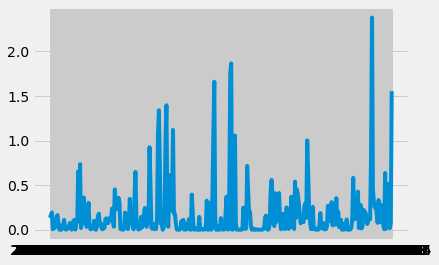

In [20]:
plt.plot(avg_months_list, avg_prcp_list)
plt.show()

In [21]:
prcp_all_date = engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()
prcp_all_date

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [23]:
dates_list=[]
prcp_list_1=[]

for x in prcp_all_date:
    dates_list.append(x[2])
    prcp_list_1.append(x[3])
    if x[2] == '2016-08-19':
        break
        
dates_list[-1]

'2016-08-19'

In [24]:
for i in reversed(dates_list):
    dates_list_reverse = list(reversed(dates_list))
    
dates_list_reverse

['2016-08-19',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-20',
 '2016-08-21',
 '2016-08-21',
 '2016-08-21',
 '2016-08-21',
 '2016-08-21',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-22',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-30',
 '2016-08-

In [25]:
for i in reversed(prcp_list_1):
    prcp_list_2 = list(reversed(prcp_list_1))
    
prcp_list_2

[0.04,
 0.2,
 0.13,
 0.0,
 0.0,
 0.03,
 0.0,
 1.08,
 0.08,
 0.41,
 0.32,
 0.12,
 1.2,
 2.32,
 0.4,
 None,
 None,
 0.94,
 0.4,
 0.7,
 1.79,
 0.02,
 None,
 0.05,
 0.15,
 0.0,
 1.45,
 2.15,
 1.22,
 None,
 2.28,
 2.15,
 0.08,
 0.11,
 0.06,
 0.21,
 0.0,
 0.0,
 0.08,
 0.08,
 0.01,
 0.0,
 0.04,
 0.02,
 0.03,
 0.0,
 None,
 0.12,
 0.0,
 0.02,
 0.18,
 0.0,
 2.07,
 0.6,
 0.14,
 0.14,
 0.14,
 0.01,
 0.9,
 0.35,
 0.0,
 None,
 0.04,
 0.17,
 0.0,
 0.05,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 2.46,
 0.24,
 0.25,
 None,
 None,
 0.1,
 0.13,
 0.01,
 0.02,
 None,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 None,
 None,
 0.19,
 0.02,
 0.0,
 1.0,
 0.12,
 0.08,
 0.07,
 0.0,
 0.44,
 0.14,
 0.74,
 0.03,
 0.03,
 0.18,
 0.03,
 0.02,
 None,
 0.11,
 None,
 1.0,
 0.11,
 0.03,
 0.04,
 0.05,
 None,
 1.35,
 0.16,
 0.11,
 0.23,
 0.1,
 0.05,
 0.15,
 0.07,
 0.01,
 None,
 0.01,
 0.22,
 0.0,
 0.35,
 0.16,
 0.23,
 None,
 0.29,
 0.01,
 0.03,
 1.16,
 0.09,
 0.14,
 0.01,
 0.0,
 0.6,
 0.3,
 0.12,
 0.18,
 0.05,
 1.04,
 0.31,
 0.15,
 None,
 None,


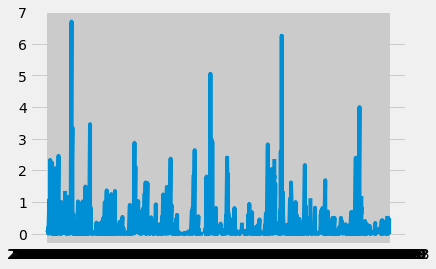

In [26]:
plt.plot(dates_list_reverse, prcp_list_2)
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates = pd.DataFrame(dates_list_reverse)
df_prcp = pd.DataFrame(prcp_list_2)

In [30]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_dates_fixed = df_dates.reset_index()
df_dates_fixed.head()

,index,0
0,0,2016-08-19
1,1,2016-08-20
2,2,2016-08-20
3,3,2016-08-20
4,4,2016-08-20


In [53]:
df_prcp_fixed = df_prcp.reset_index()
df_prcp_fixed.head()

,index,0
0,0,0.04
1,1,0.20
2,2,0.13
3,3,0.00
4,4,0.00


In [54]:
# Sort the dataframe by date

merged_prcp_date_df = pd.merge(df_dates_fixed, df_prcp_fixed, on='index')
merged_prcp_date_df.head()

,index,0_x,0_y
0,0,2016-08-19,0.04
1,1,2016-08-20,0.20
2,2,2016-08-20,0.13
3,3,2016-08-20,0.00
4,4,2016-08-20,0.00


In [55]:
merged_prcp_date_df.drop(columns=['index'], inplace=True)
merged_prcp_date_df.head()

,0_x,0_y
0,2016-08-19,0.04
1,2016-08-20,0.20
2,2016-08-20,0.13
3,2016-08-20,0.00
4,2016-08-20,0.00


In [56]:
connect = engine.connect()
first_ten_prcp  = pd.read_sql_query('SELECT date, prcp FROM Measurement', connect)
first_ten_prcp.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


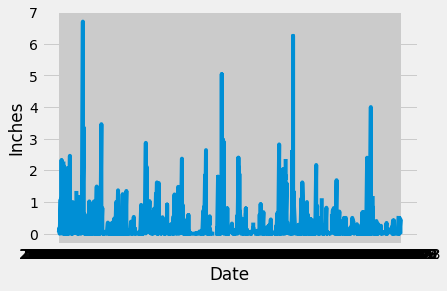

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(merged_prcp_date_df['0_x'], merged_prcp_date_df['0_y'])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
merged_prcp_date_df.describe()

,0_y
count,2038.000000
mean,0.179563
std,0.463171
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [44]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).distinct(Station.station).count()
stations

9

In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query()

In [46]:
station_count = (session.query(Measurement.station, func.count(Measurement.station))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.station).desc())
                .all())
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station_data = station_count[0][0]
active_station_data_maxminavg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == active_station_data).all()
active_station_data_maxminavg

[(54.0, 85.0, 71.66378066378067)]

In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_station_count = (session.query(Measurement.station, func.count(Measurement.tobs))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.tobs).desc())
                .all())
max_station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
